In [ ]:
pip install pyLDAvis #!!!!!!!!!!!!!!설치후 런타임 재실행 필요합니다

In [ ]:
pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 47.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813255 sha256=d97c62ac15e3beb95d0fa4651b6666a2e7d390d294e40cb64a74d5fc74885d47
  Stored in directory: /root/.cache/pip/wheels/6b/03/2b/ac2c97cc65ebd9df3516f4b900adc2f0a744df8d1375b2e2ef
Successfully built kiwipiepy-model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm # 작업 프로세스 시각화
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
DATA_PATH = '/content/drive/MyDrive/2조_누구냐, 넌!/04. 기타자료/Naver_shopping_크롤링/Modeling/한수길/data/'

In [ ]:
df = pd.read_csv(f"{DATA_PATH}최종통합본.csv")
df

,content,score,date,brand,가격,세정력/거품,향기,트러블/진정,배송/서비스/고객대응,탈모 효과 및 쿨링감,머릿결*
0,배송누락되어 본사확신다고 하시고 다시 주문번호 올려달라고 하시니 대응절차가 문제있어...,1,23.08.31.,라보에이치,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,시원하고 좋은데 뾰루지 많이나고 따갑네요,1,23.09.07.,라보에이치,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,전에 쓰던 샴푸보다 머리카락 더빠짐…,1,23.03.25.,라보에이치,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,저랑은 안맞네요 계속 쓰다보니 두피 너무 가렵고 비듬각질이 생기네요,1,23.02.18.,라보에이치,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,효과는없고 계속많이빠져요,1,22.07.27.,라보에이치,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
90699,아들이 잘 쓰고있어요,5,21.09.18.,닥터그루트,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90700,써볼께요ㅎㅎ써볼께요,5,21.09.18.,닥터그루트,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90701,맛있고 배송도 빠르고 넘 넘 좋아요~,5,21.09.17.,닥터그루트,NaN,NaN,NaN,NaN,1.0,NaN,NaN
90702,역시 닥터그루트닙니당,5,21.09.17.,닥터그루트,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = pd.concat([df.iloc[:, 0], df.iloc[:,3:]],axis=1)

In [ ]:
df

,content,brand,가격,세정력/거품,향기,트러블/진정,배송/서비스/고객대응,탈모 효과 및 쿨링감,머릿결*
0,배송누락되어 본사확신다고 하시고 다시 주문번호 올려달라고 하시니 대응절차가 문제있어...,라보에이치,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,시원하고 좋은데 뾰루지 많이나고 따갑네요,라보에이치,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,전에 쓰던 샴푸보다 머리카락 더빠짐…,라보에이치,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,저랑은 안맞네요 계속 쓰다보니 두피 너무 가렵고 비듬각질이 생기네요,라보에이치,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,효과는없고 계속많이빠져요,라보에이치,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...
90699,아들이 잘 쓰고있어요,닥터그루트,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90700,써볼께요ㅎㅎ써볼께요,닥터그루트,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90701,맛있고 배송도 빠르고 넘 넘 좋아요~,닥터그루트,NaN,NaN,NaN,NaN,1.0,NaN,NaN
90702,역시 닥터그루트닙니당,닥터그루트,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_target = df[df['brand'] == '닥터그루트'].reset_index(drop=True)
df_target

,content,brand,가격,세정력/거품,향기,트러블/진정,배송/서비스/고객대응,탈모 효과 및 쿨링감,머릿결*
0,요즘들어 머리카락이 많이 빠져서 탈모샴푸를 종류별로 바꿔가며 쓰고 있어요. 가장 잘...,닥터그루트,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,물건 자체는 문제가 없으나 판매자가 온라인 쇼핑몰을 하면 안되는 사람입니다.사람들 ...,닥터그루트,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,제품은 지금까지 사용해본 결과 좋으며 배송도 예정보다 빠르나 샴푸 3개중 2개의 펌...,닥터그루트,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,주문하고 4일이 지나도 배송출발이 안떠서 주문취소했는데 주문취소도 무시하고 일주일돼...,닥터그루트,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,물건은 이상없는데 판매자가 인간쓰레기 입니다 사이트에서 이런사람 물건 게시하지 못...,닥터그루트,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7597,아들이 잘 쓰고있어요,닥터그루트,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7598,써볼께요ㅎㅎ써볼께요,닥터그루트,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7599,맛있고 배송도 빠르고 넘 넘 좋아요~,닥터그루트,NaN,NaN,NaN,NaN,1.0,NaN,NaN
7600,역시 닥터그루트닙니당,닥터그루트,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_target_price = df_target[df_target['가격'].notnull()]
df_target_bubble = df_target[df_target['세정력/거품'].notnull()]
df_target_scent = df_target[df_target['향기'].notnull()]
df_target_trouble = df_target[df_target['트러블/진정'].notnull()]
df_target_delivery = df_target[df_target['배송/서비스/고객대응'].notnull()]
df_target_hairloss = df_target[df_target['탈모 효과 및 쿨링감'].notnull()]
df_target_texture = df_target[df_target['머릿결*'].notnull()]

# 부정적 댓글만 뽑기

In [ ]:
df_trouble_neg = df_target_trouble[df_target_trouble['트러블/진정'] == 0]
df_trouble_neg

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,brand,가격,세정력/거품,향기,트러블/진정,배송/서비스/고객대응,탈모 효과 및 쿨링감,머릿결*
13,이거 쓰고나서 머리가 너무 가려워요,닥터그루트,NaN,NaN,NaN,0.0,NaN,NaN,NaN
16,자극적입니다. 눈에 들어가지 않아도 샴푸 후 헹굴때 눈이 시큰합니다.,닥터그루트,NaN,NaN,NaN,0.0,NaN,NaN,NaN
31,저는 사용하고 비듬이 많이생겨 다른걸로바꿨어요,닥터그루트,NaN,NaN,NaN,0.0,NaN,NaN,NaN
36,가렵고 여드름남 저한텐 안맞아요,닥터그루트,NaN,NaN,NaN,0.0,NaN,NaN,NaN
175,민감성 두피와 약간의 복합성 한테는 잘 어울리지 않는 제품인 것 같아 다른 젶무 찾...,닥터그루트,NaN,NaN,NaN,0.0,NaN,NaN,NaN
179,아이들하고 같이 사용하려고 구입했는데 두피에 자꾸 뾰루지가 생기네요 TT,닥터그루트,NaN,NaN,NaN,0.0,NaN,NaN,NaN
240,향은 한방 향기. 두피가려움은 여전. 빠지는 모발 수는 큰 변화 모르겠음. 재구...,닥터그루트,NaN,NaN,1.0,0.0,NaN,NaN,NaN
244,가격 대비 대단히 좋은지는 모르겠어요 감고 나면 여전히 두피가 건조해요,닥터그루트,NaN,NaN,NaN,0.0,NaN,NaN,NaN
257,샴푸다하고 비듬이 일어나서 잘 안쓰게돼용 ㅠㅠ,닥터그루트,NaN,NaN,NaN,0.0,NaN,NaN,NaN
320,저한테는 잘안맞네요,닥터그루트,NaN,NaN,NaN,0.0,NaN,NaN,NaN


# kiwi를 이용한 형태소 분리

In [ ]:
import kiwipiepy
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
stopwords =  Stopwords()
kiwi = Kiwi()

In [ ]:
comments_lst = []

comments = kiwi.tokenize(df_trouble_neg['content'], stopwords=stopwords)

for tokens in tqdm(comments,total=df_trouble_neg.shape[0]):
    tokens = [t.form for t in tokens if t.tag in "VA" or t.tag in "XR" or t.tag in "NNP" or t.tag in "NNG"]
    comments_lst.append(tokens)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 43/43 [00:00<00:00, 581.71it/s]


# 단어 빈도수 확인

In [ ]:
from collections import Counter
vocab_counter = Counter()

for sentence in comments_lst:
    vocab_counter.update(sentence)

print(vocab_counter)

Counter({'두피': 13, '머리': 12, '사용': 10, '좋': 9, '비듬': 8, '샴푸': 7, '저': 7, '제품': 5, '구입': 5, '건조': 5, '피': 5, '이거': 4, '후': 4, '향': 4, '구매': 4, '지성': 4, '증상': 4, '뾰루지': 3, '그렇': 3, '탈모': 3, '효과': 3, '자극': 2, '눈': 2, '여드름': 2, '가려움': 2, '모발': 2, '생각': 2, '가격': 2, '느낌': 2, '장점': 2, '요즘': 2, '있': 2, '각질': 2, '중단': 2, '지루': 2, '시큰': 1, '민감': 1, '약간': 1, '복합': 1, '젶무': 1, '감사': 1, '아이': 1, '한방': 1, '향기': 1, '여전': 1, '수': 1, '크': 1, '변화': 1, '여부': 1, '판단': 1, '대비': 1, '용': 1, '단점': 1, '쿨하': 1, '셋팅펌': 1, '매직': 1, '예민': 1, '체질': 1, '뿌리': 1, '힘': 1, '풍성': 1, '납작하': 1, '오후': 1, '무난': 1, '많': 1, '성분': 1, '중간': 1, '포기': 1, '가족': 1, '문제': 1, '닥터구르트': 1, '겨울': 1, '그르': 1, '새척력': 1, '괜찮': 1, '뭐': 1, '조금': 1, '개인': 1, '특성': 1, '호불호': 1, '관리': 1, '필요': 1, '상황': 1, '시작': 1, '가늘': 1, '기름': 1, '여전하': 1, '나쁘': 1, '처음': 1, '심각하': 1, '각종': 1, '명성': 1, '이상': 1, '완화': 1, '꾸준': 1, '삼푸': 1, '개선': 1, '전': 1, '묽': 1, '기름기': 1, '쫘아아악': 1, '머리카락': 1, '어떻': 1, '마트': 1, '부담': 1, '저렴': 1, '딸아이': 1, '질': 1, '심하': 1, '비싸':

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# LDA

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dic=corpora.Dictionary(comments_lst)
dic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 빈도수 2이상, 전체 50% 이상 차지하는 단어 필터링
dic.filter_extremes(no_below=2, no_above=0.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# bag of words -> 사전 속의 단어가 문장에서 몇 번 출현하는지 빈도를 세서 벡터화
corpus = [dic.doc2bow(comments) for comments in comments_lst]
corpus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1)],
 [(2, 1), (3, 1), (4, 1)],
 [(5, 1), (6, 1), (7, 1)],
 [(7, 1), (8, 1)],
 [(9, 1), (10, 1)],
 [(6, 1), (9, 1), (11, 1), (12, 1)],
 [(4, 1), (9, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)],
 [(9, 1), (18, 1), (19, 1), (20, 1)],
 [(2, 1), (5, 1)],
 [(7, 1)],
 [(7, 2), (9, 1), (10, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(2, 1), (5, 1), (6, 1), (14, 1), (19, 1), (25, 1)],
 [(12, 1), (25, 1)],
 [(0, 1), (17, 1), (20, 2), (26, 1), (27, 1)],
 [(2, 1), (4, 1), (17, 1), (22, 1), (28, 1)],
 [(6, 2), (10, 1), (11, 1), (15, 1), (16, 1), (24, 1), (27, 2)],
 [(5, 1), (29, 1)],
 [(0, 3), (6, 1), (9, 1), (11, 1), (13, 1)],
 [(0, 1), (3, 1)],
 [(0, 1), (1, 1)],
 [(0, 1), (10, 1), (21, 1)],
 [(0, 1), (2, 1), (7, 1), (29, 1)],
 [(6, 1), (9, 1), (11, 1), (12, 1), (30, 1)],
 [(5, 1), (17, 1), (20, 1), (30, 1)],
 [(20, 1), (29, 1)],
 [(4, 1), (24, 1), (26, 1), (27, 1)],
 [(7, 1), (24, 1), (31, 1)],
 [],
 [(9, 1), (19, 1), (20, 1)],
 [(21, 1), (28, 1)],
 [(1, 1), (2, 1), (9, 1), (

## LDA 모델링

In [ ]:
from gensim.models.nmf import CoherenceModel
import matplotlib.pyplot as plt


chunksize = 2000
passes = 20
iterations = 400
eval_every = None
id2word = dic.id2token

coherence_values = []

for i in tqdm(range(2,8)):
    model = LdaModel(
        corpus=corpus,
        id2word=dic,
        chunksize=chunksize,
        alpha='auto',
        eta='auto',
        iterations=iterations,
        num_topics=i, # 최적의 토픽수 찾아보기
        passes=passes,
        eval_every=eval_every
    )
    coherence_model_lda = CoherenceModel(model=model, texts=comments_lst, dictionary=dic, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 6/6 [00:01<00:00,  3.28it/s]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


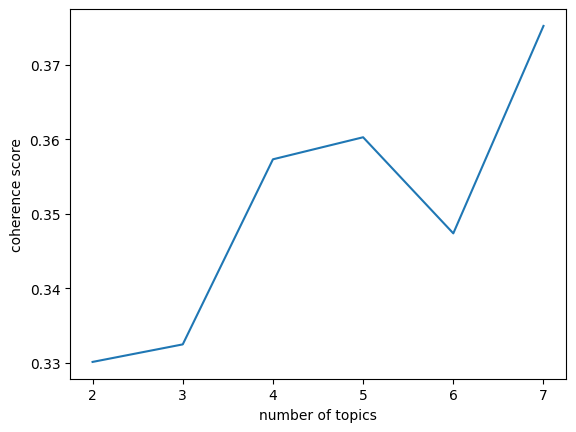

In [ ]:
x = range(2,8)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [ ]:
num_topics = 2
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = dic[0]
id2word = dic.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# top_topics = model.top_topics(corpus) # num_words=20
# top_topics

In [ ]:
# avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
# print('Average topic coherence: %.4f.' % avg_topic_coherence)

## LDA 시각화

In [ ]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, corpus, dic)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 토픽 4개로 해보기

In [ ]:
num_topics = 4
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = dic[0]
id2word = dic.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, corpus, dic)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
